0.8571428571428571


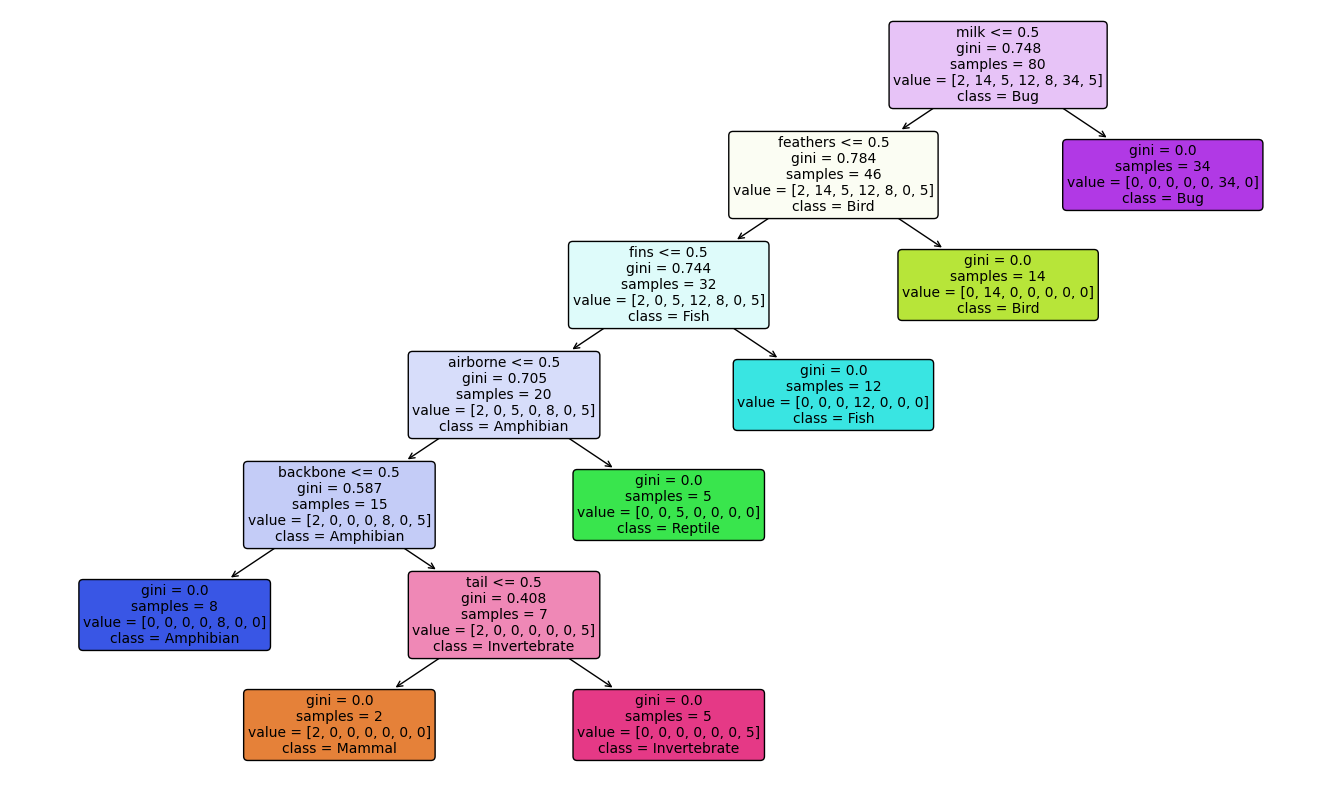

In [1]:
import sklearn.metrics
from sklearn.model_selection import train_test_split
import pandas
import matplotlib.pyplot as plt

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df = pandas.read_csv("zoo_named.csv", sep=';')

features = ['airborne', 'aquatic', 'backbone', 'breathes', 'catsize', 'domestic'
                , 'eggs', 'feathers', 'fins', 'hair', 'legs', 'milk', 'predator'
                , 'tail', 'toothed', 'venomous']

X = df[features]
y = df['class_name']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2)

dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

predictions = dtree.predict(X_test)
score = accuracy_score(y_test, predictions)
print(score)
fig, ax = plt.subplots(figsize=(17, 10))
tree.plot_tree(dtree,feature_names=features,
                     class_names=['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate'],
                     label='all',
                     rounded = True,
                     filled=True, fontsize=10)
plt.savefig('tree_view_animals.png')
plt.show()

<Axes: title={'center': 'Feature Importances of 16 Features using RandomForestClassifier'}, xlabel='relative importance'>

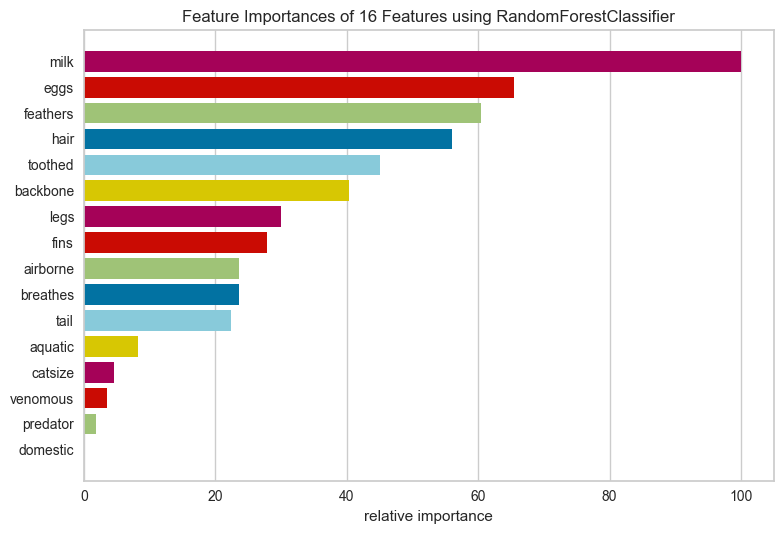

In [2]:
from sklearn.ensemble import RandomForestClassifier
"""Feature Importances Plot for Animals"""

# Importing FeatureImportances visualizer
from yellowbrick.model_selection import FeatureImportances

# Creating the feature importances plot
visualizer = FeatureImportances(RandomForestClassifier(max_depth=3),
                                relative=True)

visualizer.fit(X, y)

# Saving plot in PNG format
visualizer.show(outpath="Feature_Importances_Plot_Animals.png")

C:\Users\antal\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(


<Axes: title={'center': 'Learning Curve for DecisionTreeClassifier'}, xlabel='Training Instances', ylabel='Score'>

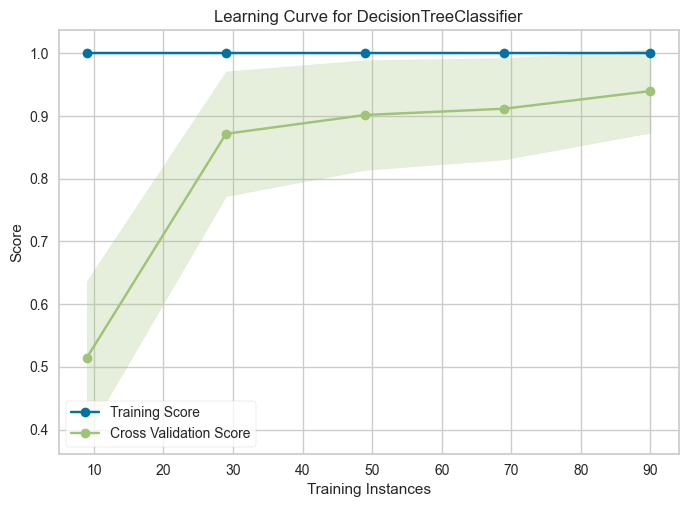

In [3]:
"""Learning Curve"""
from yellowbrick.model_selection import LearningCurve
df = pandas.read_csv("zoo_named.csv", sep=';')

features = ['airborne', 'aquatic', 'backbone', 'breathes', 'catsize', 'domestic'
                , 'eggs', 'feathers', 'fins', 'hair', 'legs', 'milk', 'predator'
                , 'tail', 'toothed', 'venomous']

X = df[features]
y = df['class_name']
# Creating the learning curve
visualizer = LearningCurve(DecisionTreeClassifier(),
                           n_jobs=-1, cv=10,
                           scoring="accuracy")

visualizer.fit(X, y)

# Saving plot in PNG format
visualizer.show(outpath="Learning_Curve_animals.png")

<Axes: title={'center': 'Class Balance for 101 Instances'}, ylabel='support'>

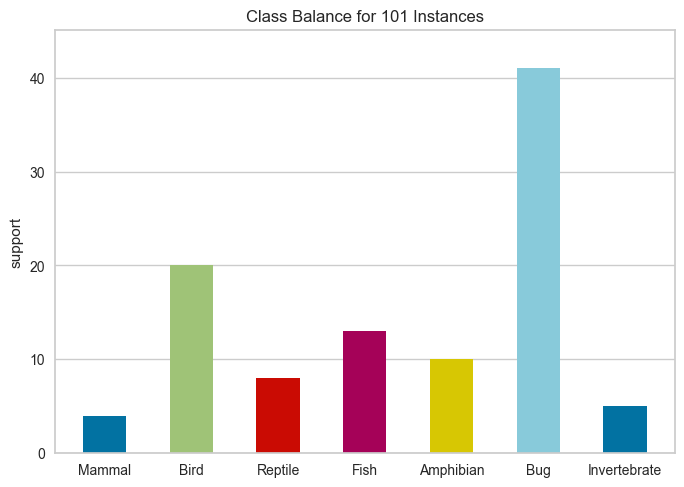

In [4]:
"""Class Imbalance Plot Animals"""
df = pandas.read_csv("zoo_named.csv", sep=';')

features = ['airborne', 'aquatic', 'backbone', 'breathes', 'catsize', 'domestic'
                , 'eggs', 'feathers', 'fins', 'hair', 'legs', 'milk', 'predator'
                , 'tail', 'toothed', 'venomous']

X = df[features]
y = df['class_name']
# Importing ClassBalance visualizer
from yellowbrick.target import ClassBalance

# Creating the class imbalance plot
visualizer = ClassBalance(labels=['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug', 'Invertebrate'])

visualizer.fit(y)

# Saving plot in PNG format
visualizer.show(outpath="Class_Imbalance_Plot_animals.png")